In [1]:
import ssl
import pandas as pd
from urllib.request import urlopen
import matplotlib.pyplot as plt

In [2]:
url = "Superstore.csv"
df = pd.read_csv(url,encoding="latin1", engine='python')

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
print("\nINFO:\n")
print(df.info())



INFO:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  

In [4]:
print("\nDESCRIBE (ALL):\n")
print(df.describe(include='all'))


DESCRIBE (ALL):

             Row ID        Order ID Order Date   Ship Date       Ship Mode  \
count   9994.000000            9994       9994        9994            9994   
unique          NaN            5009       1237        1334               4   
top             NaN  CA-2017-100111   9/5/2016  12/16/2015  Standard Class   
freq            NaN              14         38          35            5968   
mean    4997.500000             NaN        NaN         NaN             NaN   
std     2885.163629             NaN        NaN         NaN             NaN   
min        1.000000             NaN        NaN         NaN             NaN   
25%     2499.250000             NaN        NaN         NaN             NaN   
50%     4997.500000             NaN        NaN         NaN             NaN   
75%     7495.750000             NaN        NaN         NaN             NaN   
max     9994.000000             NaN        NaN         NaN             NaN   

       Customer ID  Customer Name   Segment  

In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [6]:
df[['Order Date','Ship Date']].dtypes

Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Day'] = df['Order Date'].dt.day

df['Ship Delay Days'] = (df['Ship Date'] - df['Order Date']).dt.days

In [9]:
df[['Order Date','Ship Date','Ship Delay Days']].head(10)

,Order Date,Ship Date,Ship Delay Days
0,2016-11-08,2016-11-11,3
1,2016-11-08,2016-11-11,3
2,2016-06-12,2016-06-16,4
3,2015-10-11,2015-10-18,7
4,2015-10-11,2015-10-18,7
5,2014-06-09,2014-06-14,5
6,2014-06-09,2014-06-14,5
7,2014-06-09,2014-06-14,5
8,2014-06-09,2014-06-14,5
9,2014-06-09,2014-06-14,5


In [10]:
df['Ship Delay Days'].describe()

count    9994.000000
mean        3.958175
std         1.747567
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         7.000000
Name: Ship Delay Days, dtype: float64

EDA AND VISUALIZATION


In [11]:
# Create a Year-Month column
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()
monthly_sales.head(10)

,YearMonth,Sales
0,2014-01,14236.8950
1,2014-02,4519.8920
2,2014-03,55691.0090
3,2014-04,28295.3450
4,2014-05,23648.2870
5,2014-06,34595.1276
6,2014-07,33946.3930
7,2014-08,27909.4685
8,2014-09,81777.3508
9,2014-10,31453.3930


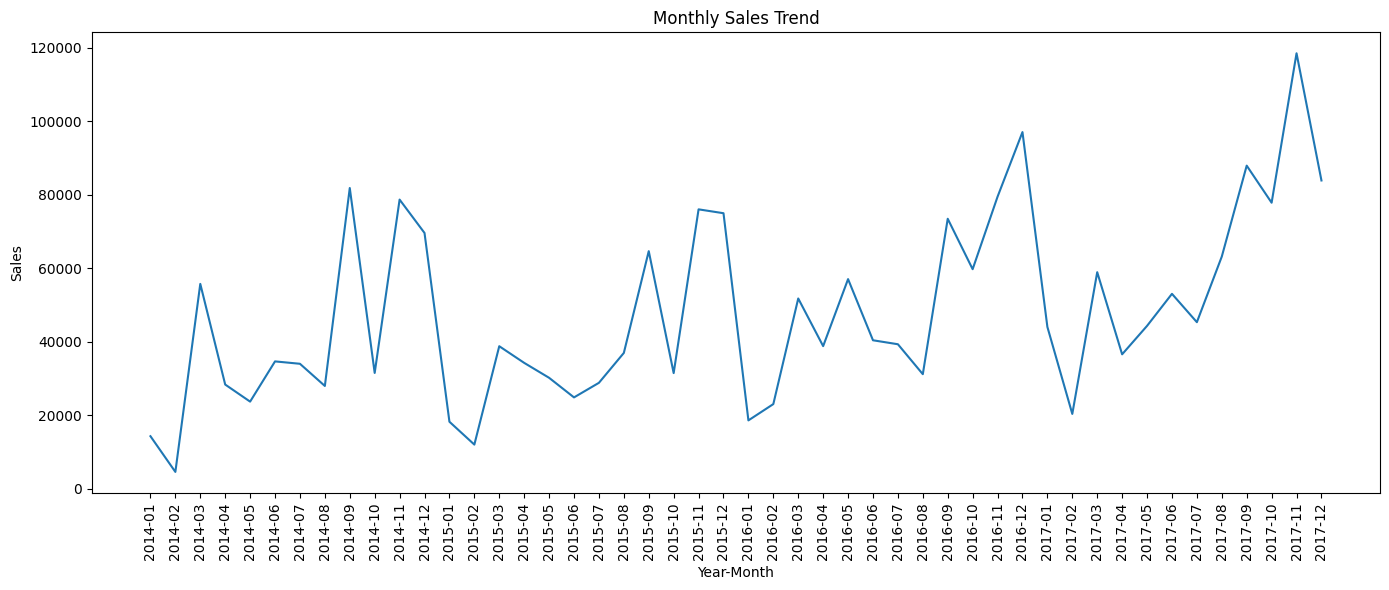

In [12]:
plt.figure(figsize=(14,6))
plt.plot(monthly_sales['YearMonth'], monthly_sales['Sales'])
plt.xticks(rotation=90)
plt.title("Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.tight_layout()
plt.show()

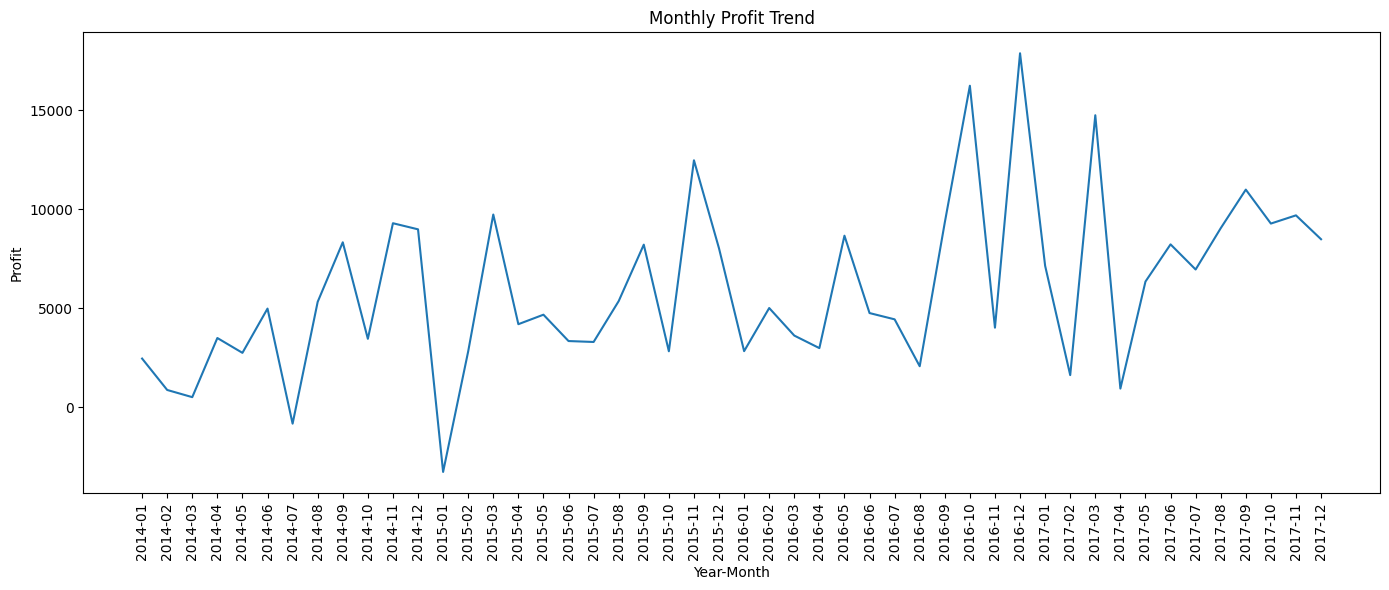

In [13]:
monthly_profit = df.groupby('YearMonth')['Profit'].sum().reset_index()


plt.figure(figsize=(14,6))
plt.plot(monthly_profit['YearMonth'], monthly_profit['Profit'])
plt.xticks(rotation=90)
plt.title("Monthly Profit Trend")
plt.xlabel("Year-Month")
plt.ylabel("Profit")
plt.tight_layout()
plt.show()

➜ The business is discount-heavy or margin-weak in certain periods.

Sales ≠ Good
Profit = Good

➜ They probably had massive discounts, clearance, or loss-leading products during that month. ( January 2017, Paradox Month)

When sales spike but profit tanks → margins died.

➜
1. Their pricing strategy is inconsistent
2. Some product categories ruin margins
3. Certain months contain “profit killers” — expensive returns, losses, bulk deals

High variability = poor cost/price control.

➜ No upward profit trend despite rising sales means structural inefficiency.

In [14]:
category_summary = df.groupby('Category').agg({
    'Sales': 'sum',
    'Profit': 'sum'
}).reset_index()

category_summary

,Category,Sales,Profit
0,Furniture,741999.7953,18451.2728
1,Office Supplies,719047.0320,122490.8008
2,Technology,836154.0330,145454.9481


In [15]:
df.groupby('Category')['Profit'].mean()

Category
Furniture           8.699327
Office Supplies    20.327050
Technology         78.752002
Name: Profit, dtype: float64

INSIGHTS:
1. Furniture is a Margin Disaster
2. Office Supplies is steady but not spectacular
3. Technology carries the business
4. Profit volatility is driven by product mix.


In [16]:
cat_month = df.groupby(['YearMonth','Category'])['Sales'].sum().reset_index()
cat_month.head()

,YearMonth,Category,Sales
0,2014-01,Furniture,6242.525
1,2014-01,Office Supplies,4851.080
2,2014-01,Technology,3143.290
3,2014-02,Furniture,1839.658
4,2014-02,Office Supplies,1071.724


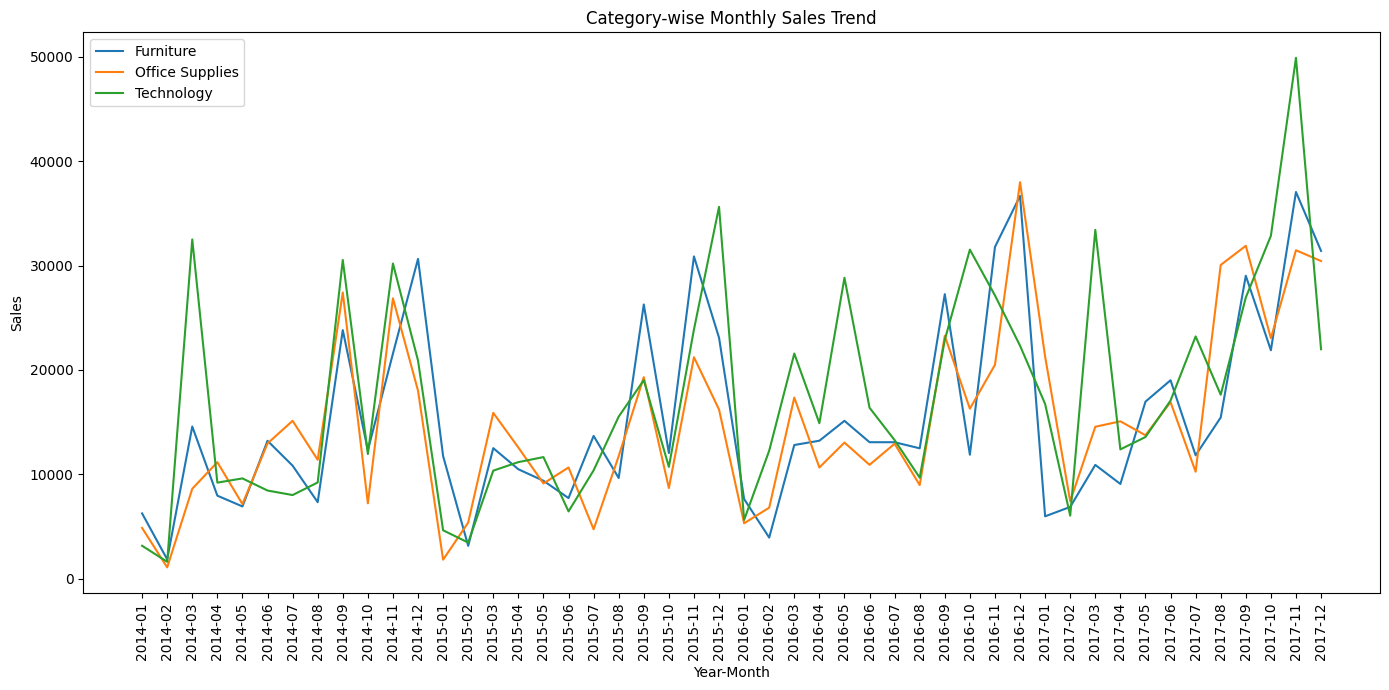

In [17]:
plt.figure(figsize=(14,7))

for cat in cat_month['Category'].unique():
    subset = cat_month[cat_month['Category'] == cat]
    plt.plot(subset['YearMonth'], subset['Sales'], label=cat)

plt.xticks(rotation=90)
plt.title("Category-wise Monthly Sales Trend")
plt.xlabel("Year-Month")
plt.ylabel("Sales")
plt.legend()
plt.tight_layout()
plt.show()

In [18]:
subcat_summary = df.groupby('Sub-Category')['Profit'].sum().sort_values()
subcat_summary

Sub-Category
Tables        -17725.4811
Bookcases      -3472.5560
Supplies       -1189.0995
Fasteners        949.5182
Machines        3384.7569
Labels          5546.2540
Art             6527.7870
Envelopes       6964.1767
Furnishings    13059.1436
Appliances     18138.0054
Storage        21278.8264
Chairs         26590.1663
Binders        30221.7633
Paper          34053.5693
Accessories    41936.6357
Phones         44515.7306
Copiers        55617.8249
Name: Profit, dtype: float64

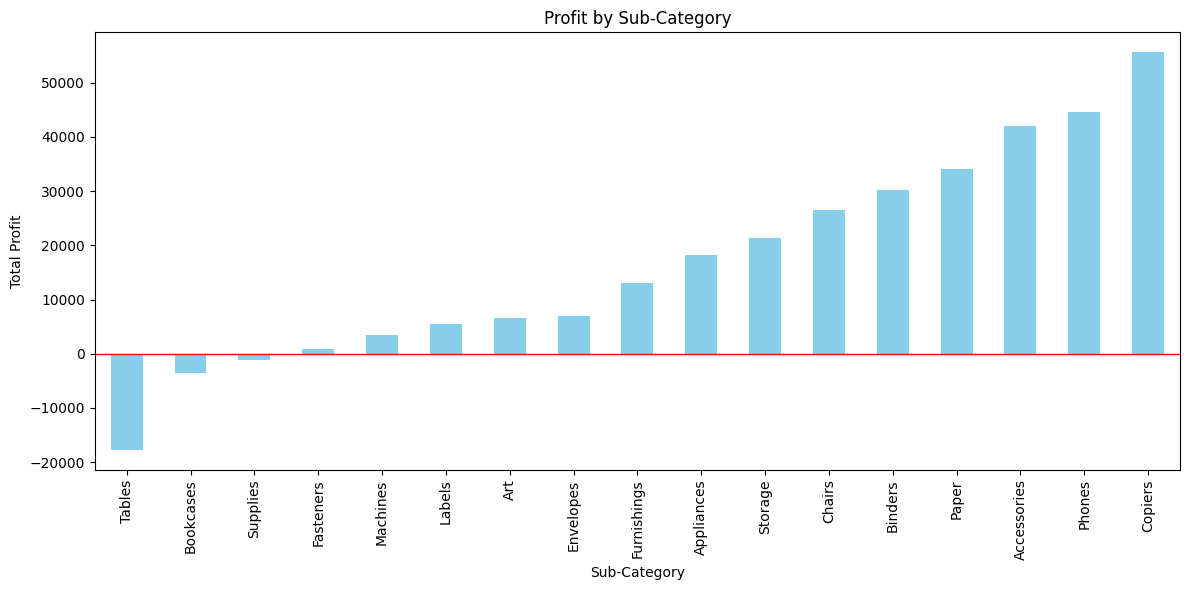

In [19]:
subcat_summary = df.groupby('Sub-Category')['Profit'].sum().sort_values()

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
subcat_summary.plot(kind='bar', color='skyblue')
plt.axhline(0, color='red', linewidth=1)
plt.title("Profit by Sub-Category")
plt.xlabel("Sub-Category")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

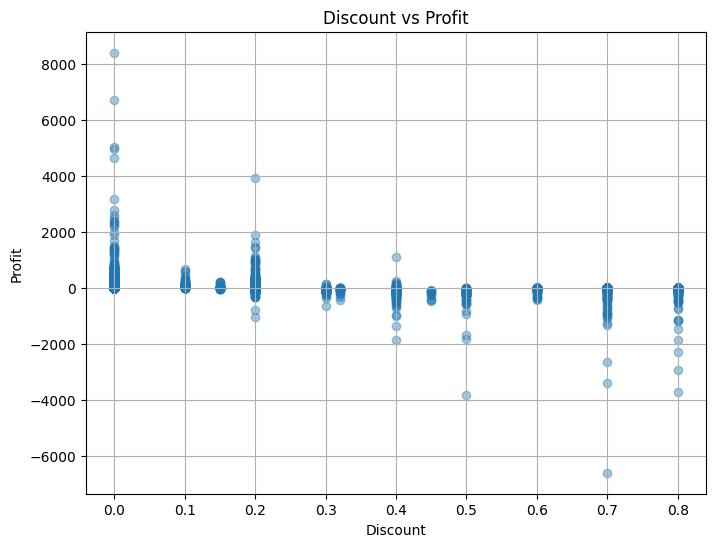

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(df['Discount'], df['Profit'], alpha=0.4)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

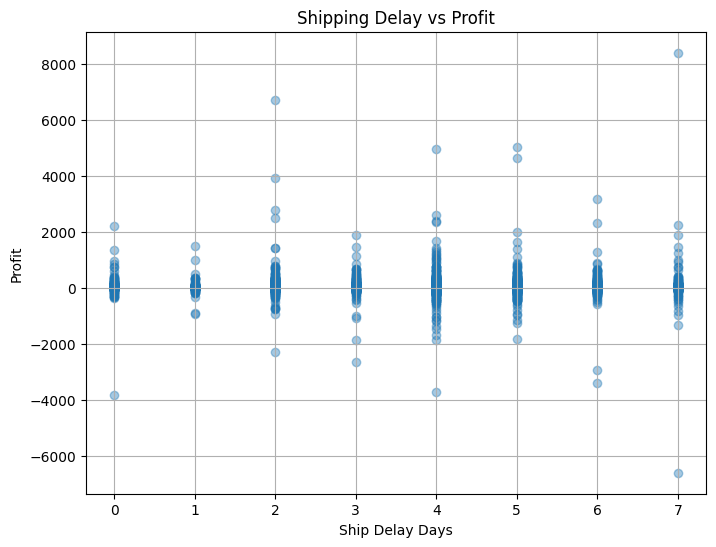

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(df['Ship Delay Days'], df['Profit'], alpha=0.4)
plt.title("Shipping Delay vs Profit")
plt.xlabel("Ship Delay Days")
plt.ylabel("Profit")
plt.grid(True)
plt.show()

***Core Insights:

--> Sales increased over time, but profit did not → margin problem

--> Profit volatility is driven by category and sub-category mix

--> Furniture (Tables, Bookcases) is structurally unprofitable

--> Technology (Copiers, Phones, Accessories) carries the business

--> High discounts are the primary cause of negative profit

-->  Shipping delay has minimal impact on profit